In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')

total_count = len(train_df)
label_zero_count = (train_df['binary-label'] == 0).sum()
label_one_count = (train_df['binary-label'] == 1).sum()

print(f"train")
print(f"전체 데이터 개수: {total_count}")
print(f"binary-label이 0인 데이터 개수: {label_zero_count}")
print(f"binary-label이 1인 데이터 개수: {label_one_count}")

train
전체 데이터 개수: 9324
binary-label이 0인 데이터 개수: 5692
binary-label이 1인 데이터 개수: 3632


In [ ]:
import pandas as pd

dev_df = pd.read_csv('dev.csv')

total_count = len(dev_df)
label_zero_count = (dev_df['binary-label'] == 0).sum()
label_one_count = (dev_df['binary-label'] == 1).sum()

print(f"dev")
print(f"전체 데이터 개수: {total_count}")
print(f"binary-label이 0인 데이터 개수: {label_zero_count}")
print(f"binary-label이 1인 데이터 개수: {label_one_count}")

dev
전체 데이터 개수: 550
binary-label이 0인 데이터 개수: 264
binary-label이 1인 데이터 개수: 286


In [ ]:
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

merged_df = pd.merge(test_df, sample_df, on='id', how='inner')

merged_df.rename(columns={'target': 'label'}, inplace=True)
merged_df['binary-label'] = (merged_df['label'] >= 2.5).astype(int)

merged_df.to_csv('merged_test.csv', index=False)

In [ ]:
test_df = pd.read_csv('merged_test.csv')

total_count = len(test_df)
label_zero_count = (test_df['binary-label'] == 0).sum()
label_one_count = (test_df['binary-label'] == 1).sum()

print(f"test")
print(f"전체 데이터 개수: {total_count}")
print(f"binary-label이 0인 데이터 개수: {label_zero_count}")
print(f"binary-label이 1인 데이터 개수: {label_one_count}")

test
전체 데이터 개수: 1100
binary-label이 0인 데이터 개수: 398
binary-label이 1인 데이터 개수: 702


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

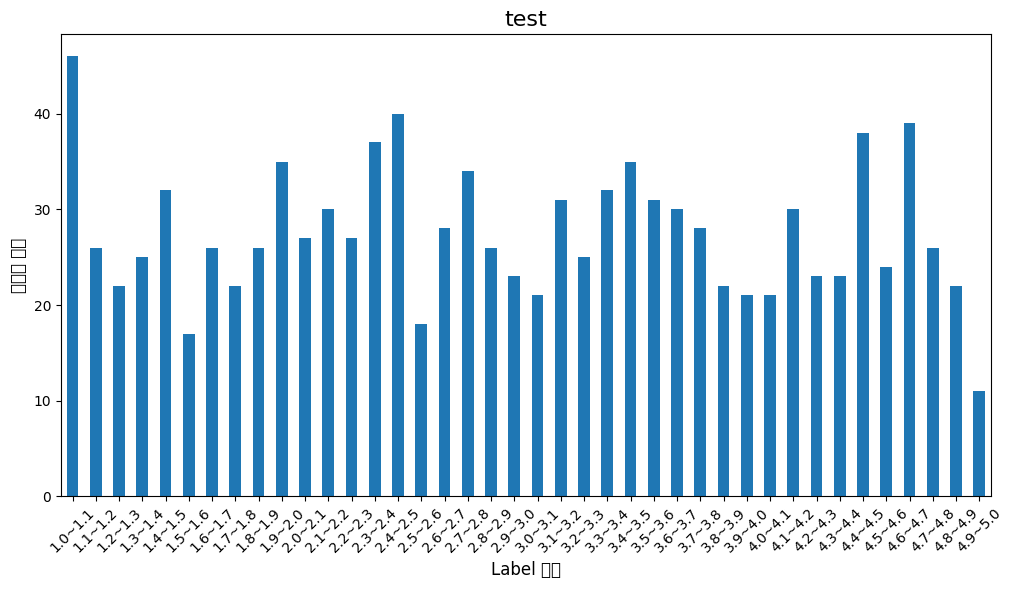

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

min_label = test_df['label'].min()
max_label = test_df['label'].max()

bins = np.arange(min_label, max_label + 0.1, 0.1)

labels = [f'{round(bins[i], 1)}~{round(bins[i+1], 1)}' for i in range(len(bins)-1)]

test_df['label_range'] = pd.cut(test_df['label'], bins=bins, labels=labels, include_lowest=True)

label_range_counts = test_df['label_range'].value_counts().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
label_range_counts.plot(kind='bar')
plt.title('test', fontsize=16)
plt.xlabel('Label 범위', fontsize=12)
plt.ylabel('데이터 개수', fontsize=12)
plt.xticks(rotation=45)
plt.show()

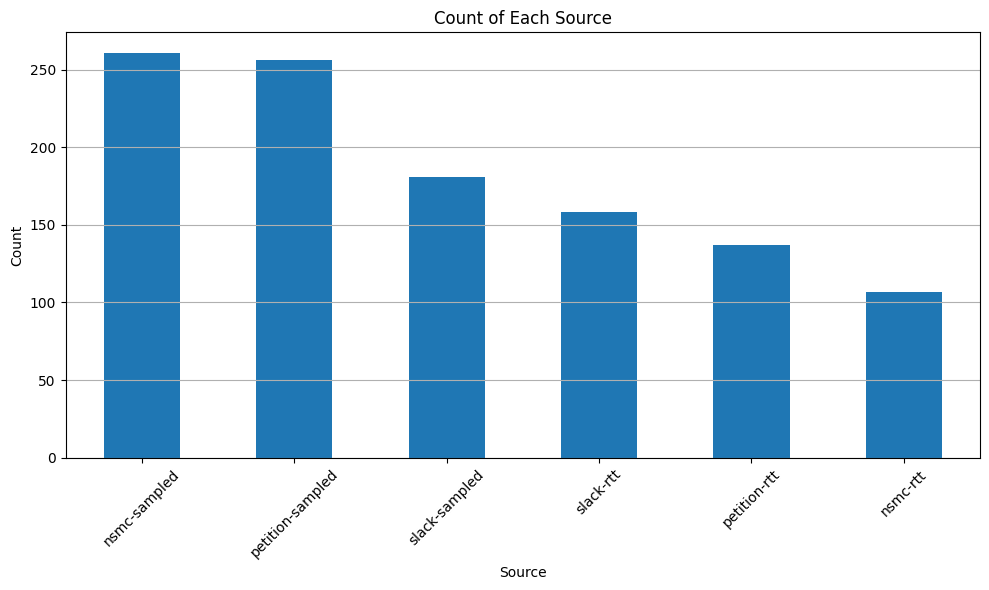

In [ ]:
source_counts = test_df['source'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title('Count of Each Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

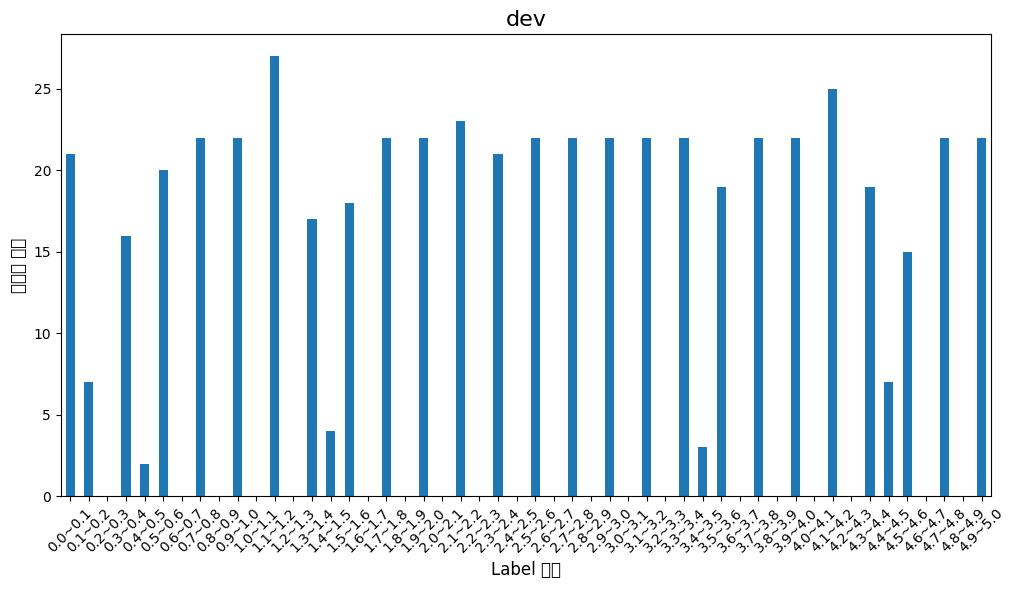

In [ ]:
min_label = dev_df['label'].min()
max_label = dev_df['label'].max()

bins = np.arange(min_label, max_label + 0.1, 0.1)

labels = [f'{round(bins[i], 1)}~{round(bins[i+1], 1)}' for i in range(len(bins)-1)]

dev_df['label_range'] = pd.cut(dev_df['label'], bins=bins, labels=labels, include_lowest=True)

label_range_counts = dev_df['label_range'].value_counts().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
label_range_counts.plot(kind='bar')
plt.title('dev', fontsize=16)
plt.xlabel('Label 범위', fontsize=12)
plt.ylabel('데이터 개수', fontsize=12)
plt.xticks(rotation=45)
plt.show()

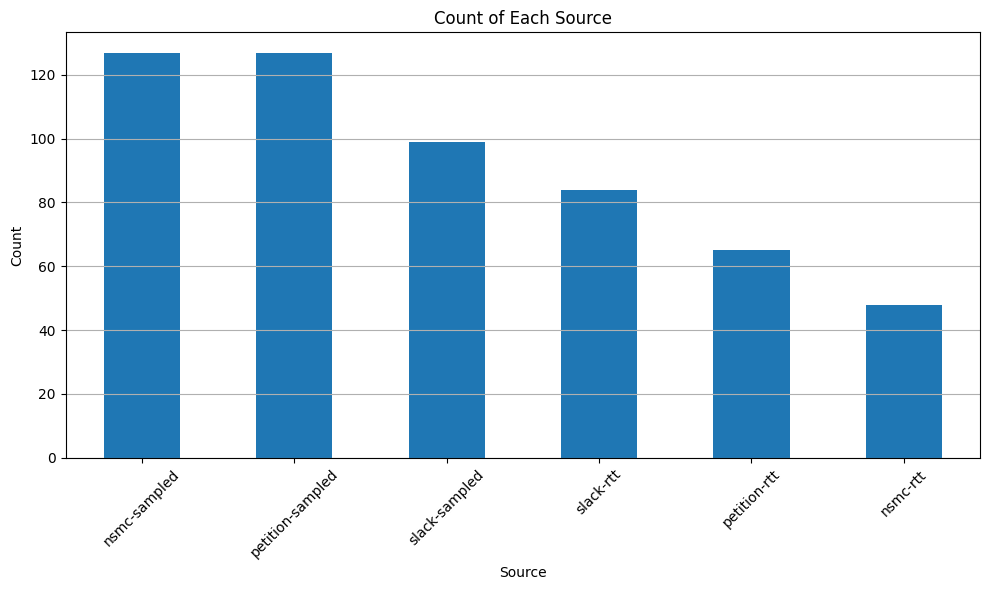

In [ ]:
source_counts = dev_df['source'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title('Count of Each Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

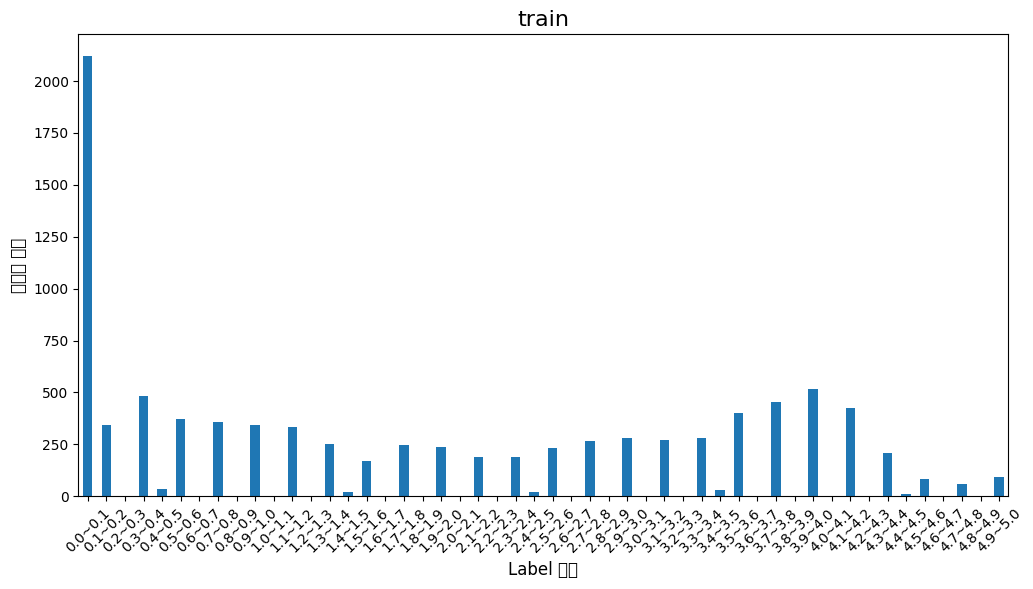

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

min_label = train_df['label'].min()
max_label = train_df['label'].max()

bins = np.arange(min_label, max_label + 0.1, 0.1)

labels = [f'{round(bins[i], 1)}~{round(bins[i+1], 1)}' for i in range(len(bins)-1)]

train_df['label_range'] = pd.cut(train_df['label'], bins=bins, labels=labels, include_lowest=True)

label_range_counts = train_df['label_range'].value_counts().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
label_range_counts.plot(kind='bar')
plt.title('train', fontsize=16)
plt.xlabel('Label 범위', fontsize=12)
plt.ylabel('데이터 개수', fontsize=12)
plt.xticks(rotation=45)
plt.show()

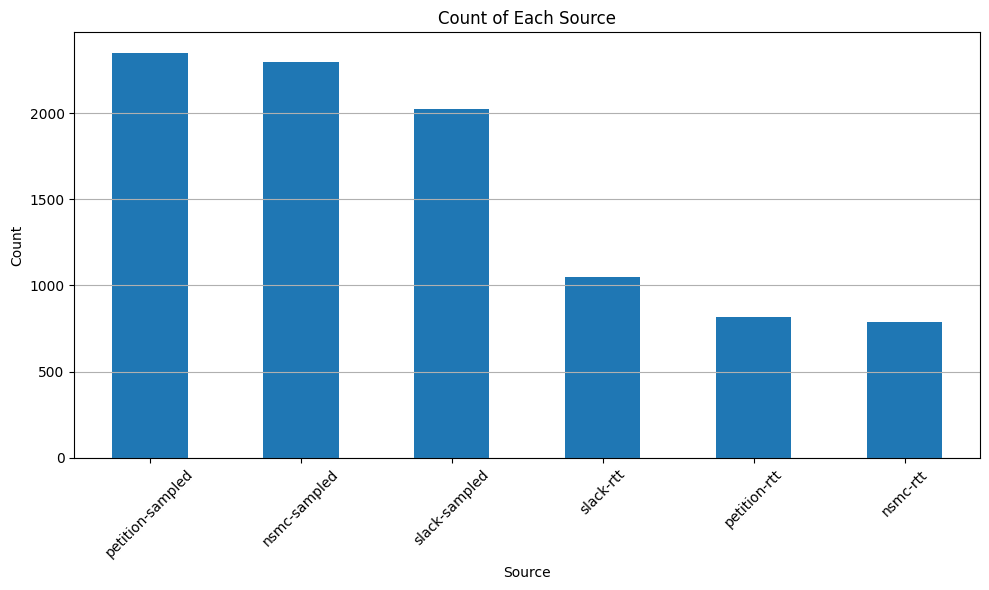

In [ ]:
source_counts = train_df['source'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title('Count of Each Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
rtt_df = train_df[train_df['source']== 'slack-rtt']

total_count = len(rtt_df)

count = len(rtt_df[((rtt_df['label'] >= 1) & (rtt_df['label'] < 3.5)) | (rtt_df['label'] >= 4)])

# 결과 출력
print(f"총 데이터 수: {total_count}")
print(f"label >= 1 데이터 수: {count}")

총 데이터 수: 1047
label >= 1 데이터 수: 733


In [ ]:
rtt_df = train_df[train_df['source']== 'petition-rtt']

total_count = len(rtt_df)

count = len(rtt_df[((rtt_df['label'] >= 1) & (rtt_df['label'] < 3.5)) | (rtt_df['label'] >= 4)])

# 결과 출력
print(f"총 데이터 수: {total_count}")
print(f"label >= 1 데이터 수: {count}")

총 데이터 수: 817
label >= 1 데이터 수: 627


In [ ]:
rtt_df = train_df[train_df['source']== 'nsmc-rtt']

total_count = len(rtt_df)

count = len(rtt_df[((rtt_df['label'] >= 1) & (rtt_df['label'] < 3.5)) | (rtt_df['label'] >= 4)])

# 결과 출력
print(f"총 데이터 수: {total_count}")
print(f"label >= 1 데이터 수: {count}")

총 데이터 수: 788
label >= 1 데이터 수: 525


In [ ]:
df_swapped = train_df[((train_df['label'] >= 1) & (train_df['label'] < 3.5)) | (train_df['label'] >= 4)].copy()
df_swapped['sentence_1'], df_swapped['sentence_2'] = train_df['sentence_2'], train_df['sentence_1']

df_combined = pd.concat([train_df, df_swapped], ignore_index=True)

df_combined.to_csv('combined_train.csv', index=False)

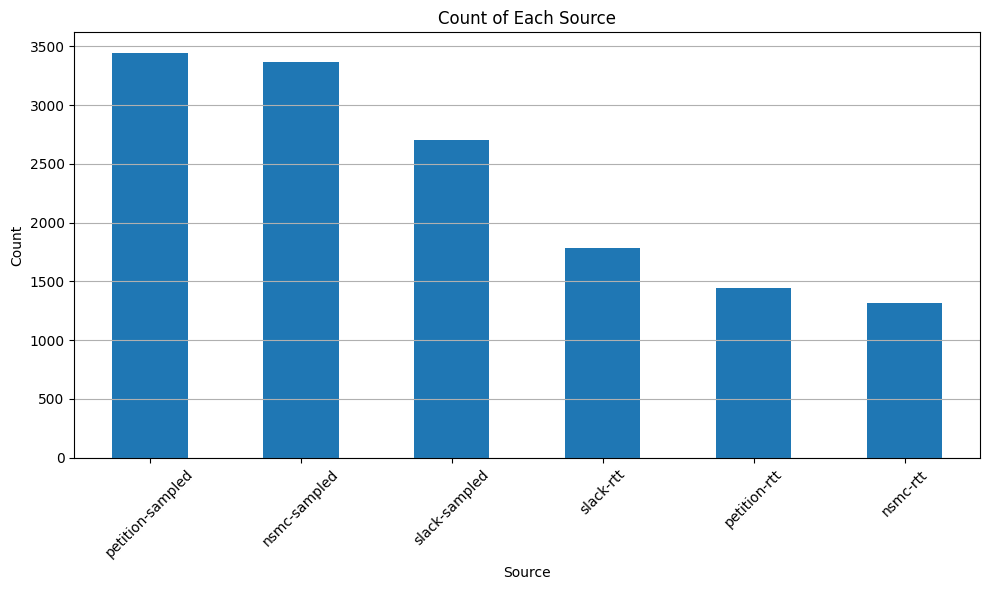

In [ ]:
combined_df = pd.read_csv('combined_train.csv')

source_counts = combined_df['source'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title('Count of Each Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

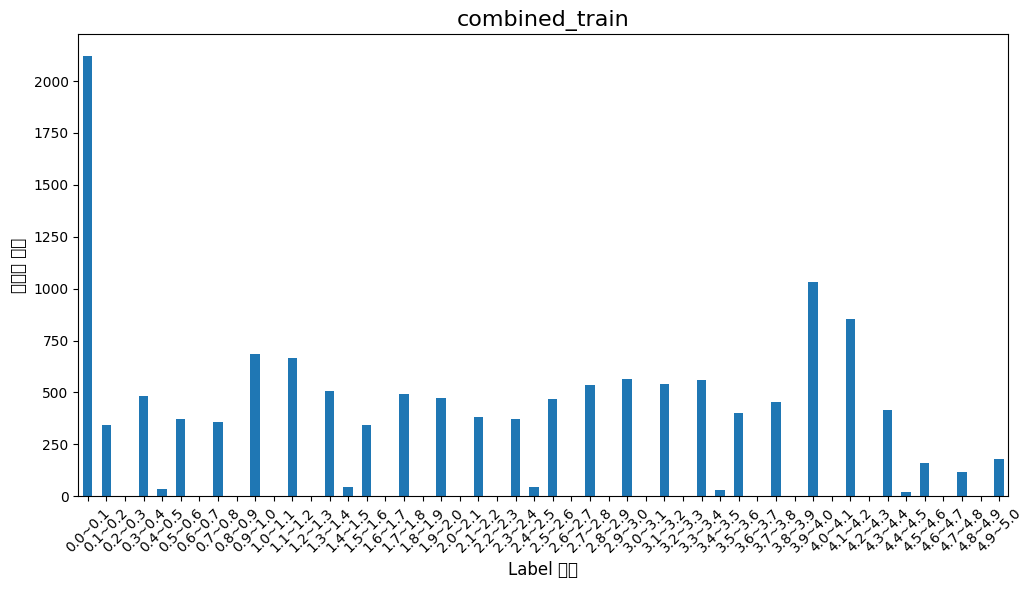

In [ ]:
min_label = combined_df['label'].min()
max_label = combined_df['label'].max()

bins = np.arange(min_label, max_label + 0.1, 0.1)

labels = [f'{round(bins[i], 1)}~{round(bins[i+1], 1)}' for i in range(len(bins)-1)]

combined_df['label_range'] = pd.cut(combined_df['label'], bins=bins, labels=labels, include_lowest=True)

label_range_counts = combined_df['label_range'].value_counts().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
label_range_counts.plot(kind='bar')
plt.title('combined_train', fontsize=16)
plt.xlabel('Label 범위', fontsize=12)
plt.ylabel('데이터 개수', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
combined_df = pd.read_csv('combined_train.csv')

sampled_df_s = combined_df[combined_df['source'] == 'slack-sampled']
filtered_df_s = sampled_df_s[sampled_df_s['label'] == 0]

sampled_df_p = combined_df[combined_df['source'] == 'petition-sampled']
filtered_df_p = sampled_df_p[sampled_df_p['label'] == 0]

# count_s = len(filtered_df_s)
# print(f"slack label == 0 데이터 수: {count_s}")

# count_p = len(filtered_df_p)
# print(f"petition label == 0 데이터 수: {count_p}")

half_df_s = filtered_df_s.head(len(filtered_df_s) // 2)
half_df_s['sentence_2'] = half_df_s['sentence_1']
half_df_s['label'] = 5

half_df_p = filtered_df_p.head(len(filtered_df_p) // 2)
half_df_p['sentence_2'] = half_df_p['sentence_1']
half_df_p['label'] = 5

filtered_df_s = sampled_df_s[sampled_df_s['label'] != 0]
filtered_df_p = sampled_df_p[sampled_df_p['label'] != 0]

etc_df = combined_df[((combined_df['source'] != 'slack-sampled') & (combined_df['source'] != 'petition-sampled'))]

aug_1 = pd.concat([half_df_s, half_df_p], ignore_index=True)
aug_2 = pd.concat([aug_1, filtered_df_s], ignore_index=True)
aug_3 = pd.concat([aug_2, filtered_df_p], ignore_index=True)
aug_4 = pd.concat([aug_3, etc_df], ignore_index=True)

aug_4.to_csv('train_aug_5.csv', index=False)

<ipython-input-6-a47086df53b0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  half_df_s['sentence_2'] = half_df_s['sentence_1']
<ipython-input-6-a47086df53b0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  half_df_s['label'] = 5
<ipython-input-6-a47086df53b0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

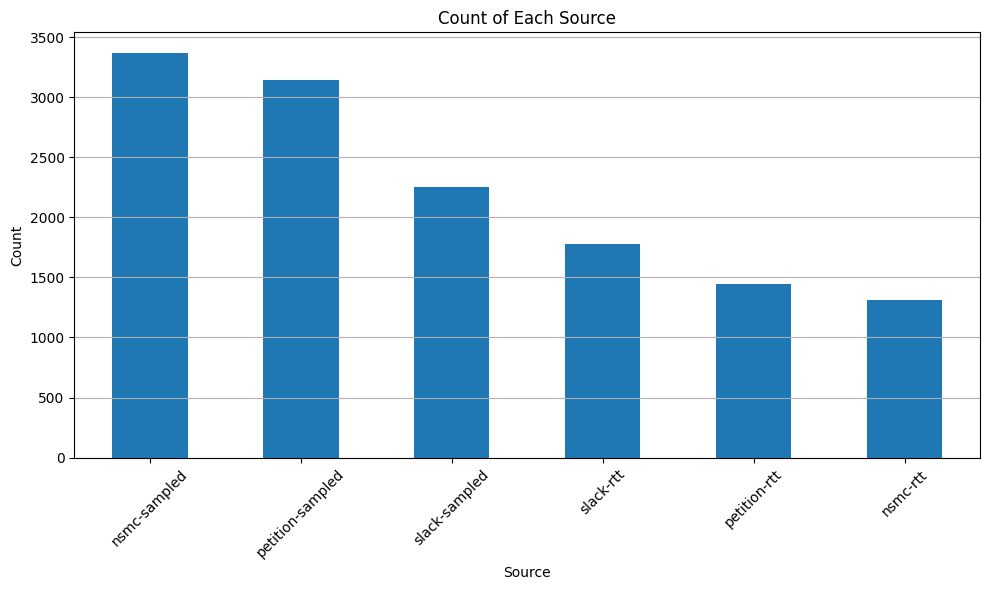

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

combined_df = pd.read_csv('train_aug_3.csv')

source_counts = combined_df['source'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title('Count of Each Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

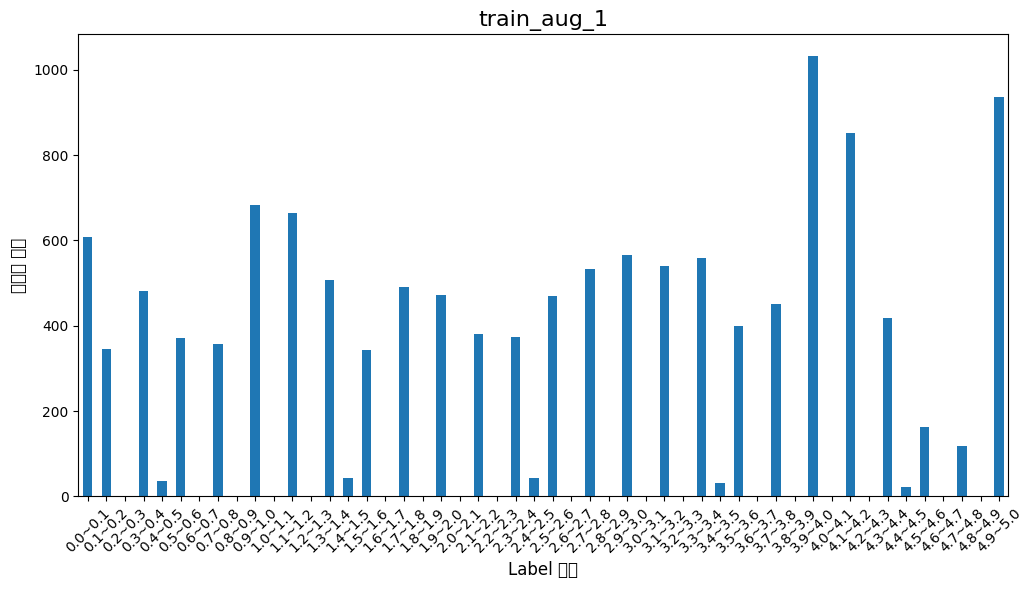

In [ ]:
min_label = combined_df['label'].min()
max_label = combined_df['label'].max()

bins = np.arange(min_label, max_label + 0.1, 0.1)

labels = [f'{round(bins[i], 1)}~{round(bins[i+1], 1)}' for i in range(len(bins)-1)]

combined_df['label_range'] = pd.cut(combined_df['label'], bins=bins, labels=labels, include_lowest=True)

label_range_counts = combined_df['label_range'].value_counts().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
label_range_counts.plot(kind='bar')
plt.title('train_aug_1', fontsize=16)
plt.xlabel('Label 범위', fontsize=12)
plt.ylabel('데이터 개수', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('dev.csv')

# sentence_1과 sentence_2만 교환한 새로운 데이터프레임 생성
df_swapped = df.copy()
df_swapped['sentence_1'], df_swapped['sentence_2'] = df['sentence_2'], df['sentence_1']

# 기존 데이터와 바꾼 데이터를 연결 (concat)
df_combined = pd.concat([df, df_swapped], ignore_index=True)

# 수정된 데이터프레임을 새 CSV 파일로 저장
df_combined.to_csv('combined_dev_5.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('train_aug_5.csv')
dev_df = pd.read_csv('combined_dev_5.csv')

train_dev_df = pd.concat([train_df, dev_df], ignore_index=True)

train_split, dev_split = train_test_split(combined_df, test_size=0.2, random_state=42)

train_split.to_csv('new_train_5.csv', index=False)
dev_split.to_csv('new_dev_5.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'train_aug_5.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_dev_2 = pd.read_csv('train_dev_2.csv')

train_split, dev_split = train_test_split(train_dev_2, test_size=0.2, random_state=42)

train_split.to_csv('new_train_5.csv', index=False)
dev_split.to_csv('new_dev_5.csv', index=False)